In [1]:
import pandas as pd
import sys

sys.path.append("..")
from models.clustering import KmeansClustering, MeanShiftClustering

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Social Cases Data
social_housing_df = pd.read_csv('../data/processed/paris_social_housing.xls')
social_housing_df.head()

,IRIS,Social_Housing
0,751010101,0.290378
1,751010102,0.000000
2,751010103,0.045988
3,751010104,0.000000
4,751010105,0.000000


K-Means

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

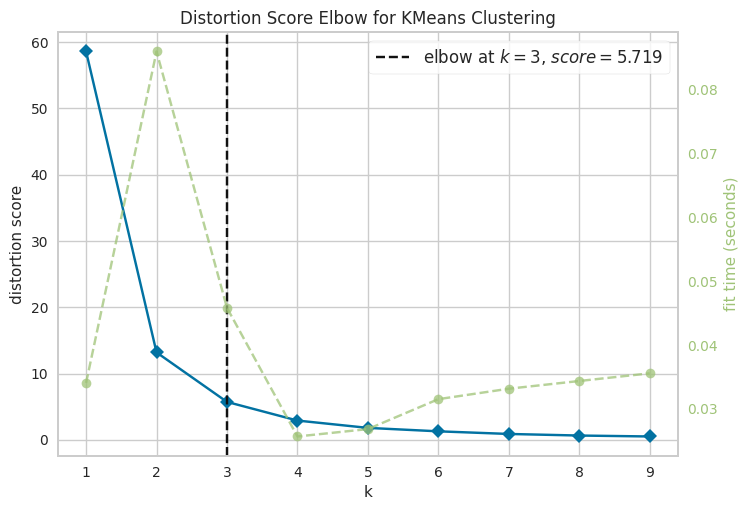

In [3]:
# Applying Kmeans Clustering
kmeans = KmeansClustering(social_housing_df, 'Social_Housing')
kmeans.visualize_elbow()

In [4]:
# We pick k by sight, and apply kmeans with k
labelsK, centersK = kmeans.fit(k = 3)

In [5]:
# Table KMeans 
kmeans_df = social_housing_df.copy()
kmeans_df['kmeans_class'] = labelsK
kmeans_df = kmeans_df.set_index('IRIS')
kmeans_df.head()

,Social_Housing,kmeans_class
IRIS,,
751010101,0.290378,0
751010102,0.000000,1
751010103,0.045988,1
751010104,0.000000,1
751010105,0.000000,1


In [6]:
# Table centroids
kmeans_centroids_df = pd.DataFrame({'centroids' : centersK,
                             'count' : kmeans_df.groupby('kmeans_class').size()})

kmeans_centroids_df = kmeans_centroids_df.sort_values('centroids')
kmeans_centroids_df['class'] = list(range(len(centersK)))
kmeans_centroids_df = kmeans_centroids_df.set_index('class')
kmeans_centroids_df

,centroids,count
class,,
0,0.040812,697
1,0.317130,185
2,0.765432,105


In [7]:
# Export KMeans results
kmeans_df.to_csv('../data/final/paris_social_housing_kmeans.csv')
kmeans_centroids_df.to_csv('../data/final/paris_social_housing_kmeans_centroids.csv')

Mean Shift

In [8]:
# Applying Meanshift Clustering
meanshift = MeanShiftClustering(social_housing_df, 'Social_Housing')
labelsM, centersM = meanshift.fit()

In [9]:
# Table Meanshift
meanshift_df = social_housing_df.copy()
meanshift_df['meanshift_class'] = labelsM
meanshift_df = meanshift_df.set_index('IRIS')
meanshift_df.head()

,Social_Housing,meanshift_class
IRIS,,
751010101,0.290378,1
751010102,0.000000,0
751010103,0.045988,0
751010104,0.000000,0
751010105,0.000000,0


In [10]:
# Table centroids
meanshift_centroids_df = pd.DataFrame({'centroids' : centersM,
                             'count' : meanshift_df.groupby('meanshift_class').size()})

meanshift_centroids_df = meanshift_centroids_df.sort_values('centroids')
meanshift_centroids_df['class'] = list(range(len(centersM)))
meanshift_centroids_df = meanshift_centroids_df.set_index('class')
meanshift_centroids_df

,centroids,count
class,,
0,0.030861,779
1,0.515363,126
2,0.696947,31
3,0.849178,51


In [11]:
# Export Meanshift results
meanshift_df.to_csv('../data/final/paris_social_housing_meanshift.csv')
meanshift_centroids_df.to_csv('../data/final/paris_social_housing_meanshift_centroids.csv')